In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pio.renderers.default = "png" # For GitHub rendering

# Issuance Sweep Run Experiment

*Danilo Lessa Bernardineli, Shawn Anderson November 2023*

In this notebook, we run an issuance sweep run that compares two parameter sets. 


## Part 1. Running the Simulation

In [2]:
sim_df = pd.read_pickle("../data/simulations/issuance_sweep-2023-12-19_14-18-43.pkl.gz")

In [3]:
sim_df = sim_df.set_index(['label', 'run', 'days_passed'])

In [4]:
sim_df.head()

delta_days  delta_blocks  \
label                     run days_passed                             
default-issuance-function 1   0                   NaN           NaN   
                              1                   1.0       14400.0   
                              2                   1.0       14400.0   
                              3                   1.0       14400.0   
                              4                   1.0       14400.0   

                                           circulating_supply   user_supply  \
label                     run days_passed                                     
default-issuance-function 1   0                           NaN           NaN   
                              1                  1.440015e+06  1.440015e+06   
                              2                  2.878909e+06  2.878909e+06   
                              3                  4.318002e+06  4.318014e+06   
                              4                  5.757144e+06  5.757206e+06   

                                           issued_supply  sum_of_stocks  \
label                     run days_passed                                 
default-issuance-function 1   0                      NaN            NaN   
                              1             1.681440e+09   3.000000e+09   
                              2             1.682880e+09   3.000000e+09   
                              3             1.684320e+09   3.000000e+09   
                              4             1.685760e+09   3.000000e+09   

                                           block_utilization  \
label                     run days_passed                      
default-issuance-function 1   0                          NaN   
                              1                     0.000004   
                              2                     0.000012   
                              3                     0.000015   
                              4                     0.000016   

                                           dsf_relative_disbursal_per_day  \
label                     run days_passed                                   
default-issuance-function 1   0                                       0.0   
                              1                                       0.0   
                              2                                       0.0   
                              3                                       0.0   
                              4                                       0.0   

                                           reward_issuance_balance  \
label                     run days_passed                            
default-issuance-function 1   0                       1.320000e+09   
                              1                       1.318560e+09   
                              2                       1.317120e+09   
                              3                       1.315680e+09   
                              4                       1.314240e+09   

                                           other_issuance_balance  ...  \
label                     run days_passed                          ...   
default-issuance-function 1   0                      1.680000e+09  ...   
                              1                      1.680000e+09  ...   
                              2                      1.680000e+09  ...   
                              3                      1.680000e+09  ...   
                              4                      1.680000e+09  ...   

                                            base_fee_function  \
label                     run days_passed                       
default-issuance-function 1   0            function: <lambda>   
                              1            function: <lambda>   
                              2            function: <lambda>   
                              3            function: <lambda>   
                              4            function: <lambda>   

          

In [5]:
sim_df['block_reward'].groupby('label').describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
default-issuance-function,1402.0,1.440017e+06,1.459969e+01,1.439996e+06,1.440004e+06,1.440016e+06,1.440026e+06,1.440077e+06
mock-issuance-function,1402.0,1.881383e+06,2.992856e+06,1.162011e+04,6.746074e+04,3.916445e+05,2.273699e+06,1.320000e+07
mock-issuance-function-2,1402.0,1.883024e+06,4.983792e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.320000e+09


In [6]:
sim_df['block_utilization'].groupby('label').describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
default-issuance-function,1402.0,0.000011,0.000004,0.000004,0.000008,0.000011,0.000014,0.000025
mock-issuance-function,1402.0,0.000011,0.000004,0.000004,0.000008,0.000011,0.000014,0.000025
mock-issuance-function-2,1402.0,0.000011,0.000004,0.000004,0.000008,0.000011,0.000014,0.000025


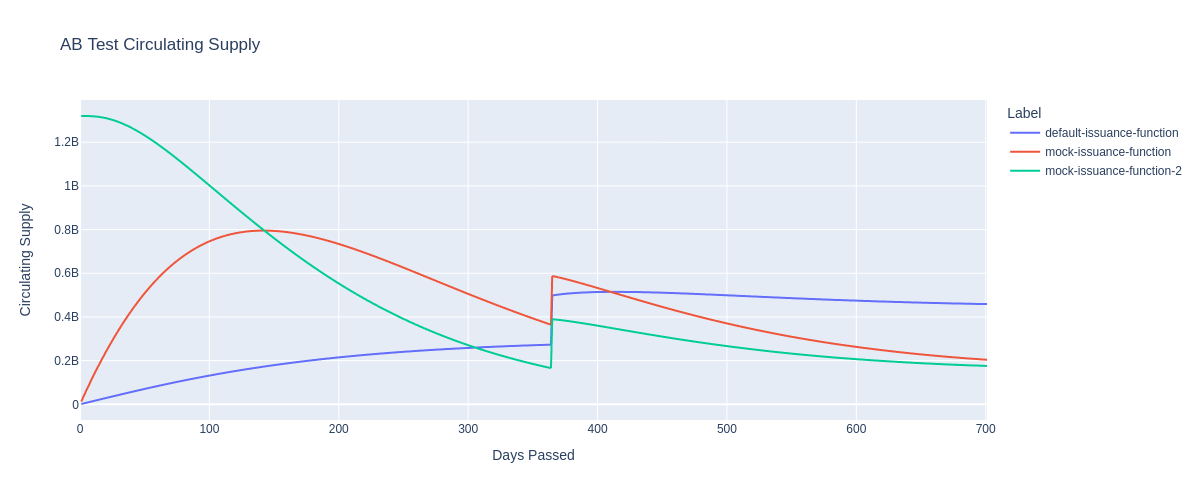

In [7]:
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values('days_passed'),
    y="circulating_supply",
    title="AB Test Circulating Supply",
    color=sim_df.index.get_level_values('label'),
    labels={
        "circulating_supply": "Circulating Supply",
        "x": "Days Passed",
        "color": "Label"
    }
)
fig.update_layout(width=1200, height=500)
fig.show()

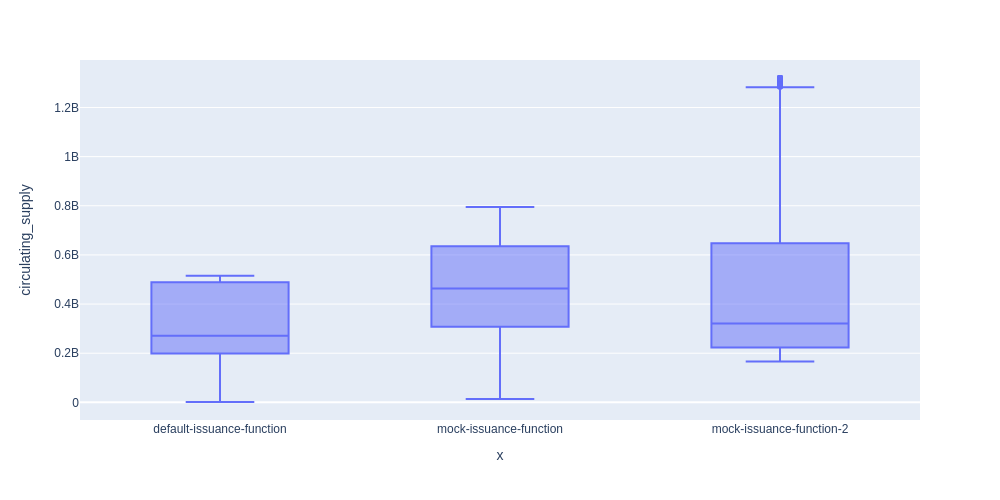

In [8]:
# box plot
fig = px.box(
    sim_df,
    x=sim_df.index.get_level_values('label'),
    y="circulating_supply",)
fig.update_layout(width=1000, height=500)
fig.show()

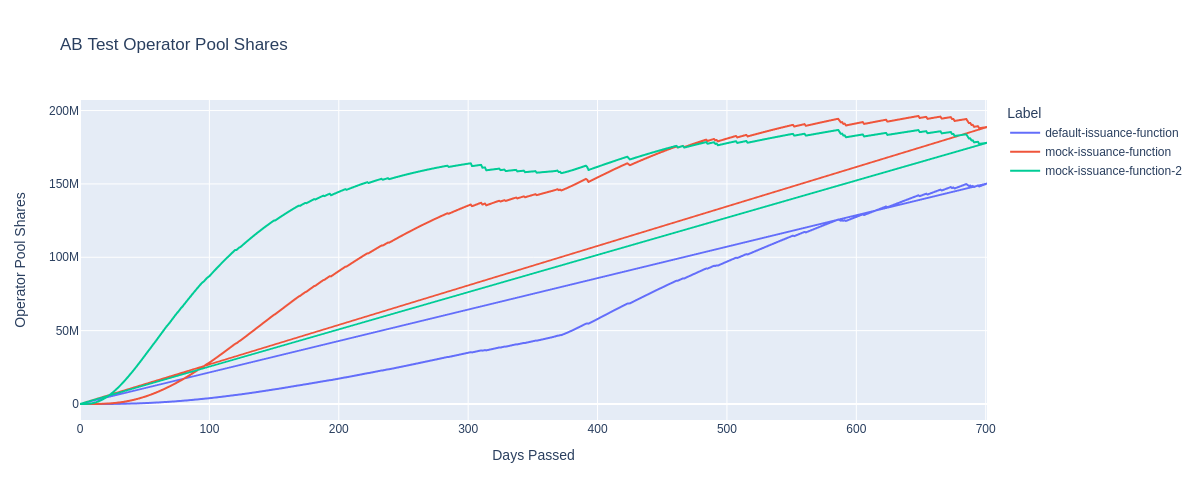

In [9]:
# sns.lineplot(sim_df, x="days_passed", y="operator_pool_shares", hue="label").set(
#     title="AB Test Operator Pool Shares"
# )
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="operator_pool_shares",
    title="AB Test Operator Pool Shares",
    color=sim_df.index.get_level_values("label"),
    labels={
        "operator_pool_shares": "Operator Pool Shares",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

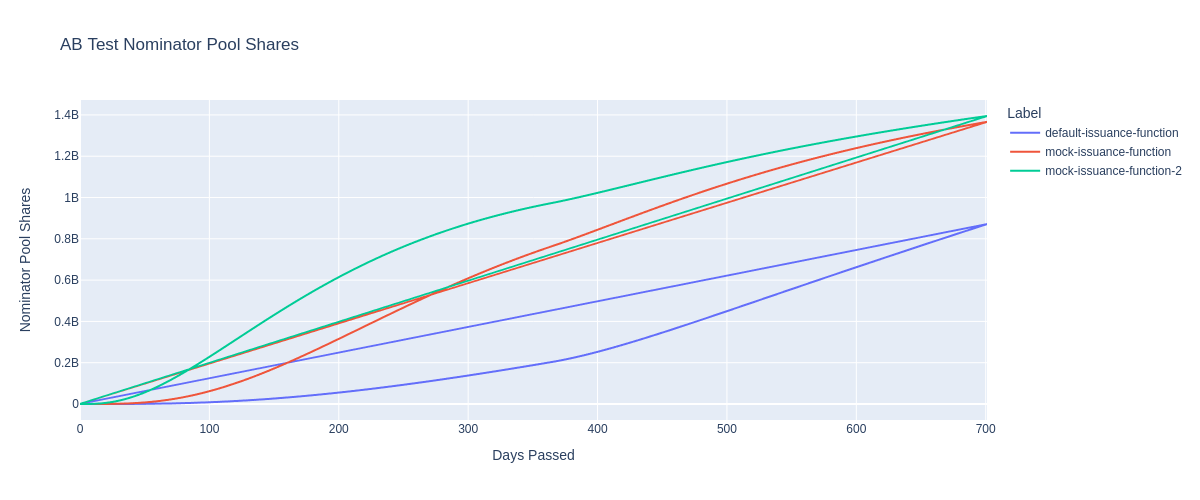

In [18]:
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="nominator_pool_shares",
    title="AB Test Nominator Pool Shares",
    color=sim_df.index.get_level_values("label"),
    labels={
        "nominator_pool_shares": "Nominator Pool Shares",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

In [19]:
from subspace_model.experiments.charts import ab_circulating_supply_volatility

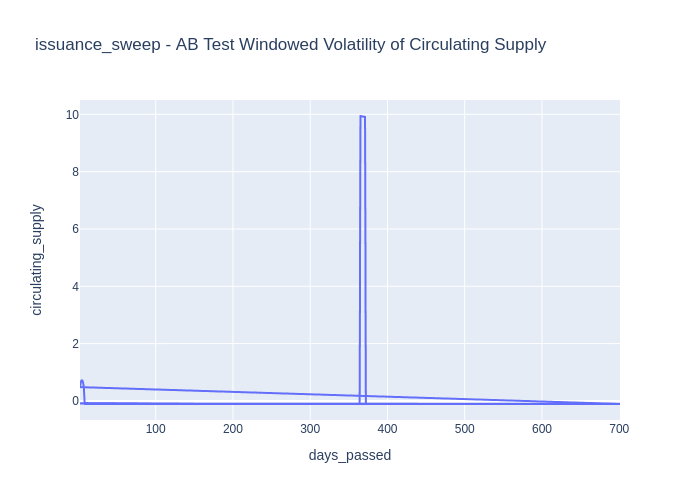

In [20]:
ab_circulating_supply_volatility(sim_df.reset_index(), experiment='issuance_sweep')